In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from glob import glob
import pydot
from IPython.display import Image

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

## Features used

In [3]:
featuresA = ["has_name", "has_image", "has_location",
             "normal_name", "favourites_count",
             "has_biography", "tweet_count",
             "followers_count", "friends_count",
             "ratio_followers_friends", "ratio_friends_followers",
             "ratio_followers_friends_pow", "ratio_friends_followers_pow",
             "has_url", "bot_in_biography",
             "is_listed", "listed_count"]

## Data retreival

In [4]:
cresci2015files = glob("datas/cresci-2015/*/users.csv")
tmp = []
for f in cresci2015files:
    df = pd.read_csv(f, index_col=None, header=0)
    tmp.append(df)
cresci2015 = pd.concat(tmp)
cresci2015 = cresci2015.set_index("id")

In [5]:
cresci2015["tweet_count"] = cresci2015.statuses_count
cresci2015 = cresci2015.fillna(0)
replace_from = ["name", "location", "default_profile_image", "description", "url", "listed_count"]
replace_to = ["has_name", "has_location", "has_image", "has_biography", "has_url", "is_listed"]
cresci2015[replace_to] = cresci2015[replace_from].astype(bool)
cresci2015["normal_name"] = cresci2015.name.str.contains(r"^[a-zA-Z0-9\s\.]+$")
cresci2015["ratio_followers_friends"] = cresci2015.followers_count / cresci2015.friends_count
cresci2015["ratio_friends_followers"] = cresci2015.friends_count / cresci2015.followers_count
cresci2015["ratio_followers_friends_pow"] = cresci2015.followers_count / cresci2015.friends_count**2
cresci2015["ratio_friends_followers_pow"] = cresci2015.friends_count / cresci2015.followers_count**2
cresci2015["bot_in_biography"] = cresci2015.description.str.contains("\Wbot\W").fillna(False)

In [6]:
cresci2015

,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,url,lang,...,has_image,has_biography,has_url,is_listed,normal_name,ratio_followers_friends,ratio_friends_followers,ratio_followers_friends_pow,ratio_friends_followers_pow,bot_in_biography
id,,,,,,,,,,,,,,,,,,,,,
1120176186,Madonna Carson,MadonnaCarson,22,11,257,0,0,Fri Jan 25 20:18:39 +0000 2013,0,en,...,False,True,False,False,True,0.042802,23.363636,0.000167,2.123967,False
1124249136,Ardelle Mckee,ArdelleMckee,20,11,226,0,0,Sun Jan 27 07:18:34 +0000 2013,0,en,...,False,False,False,False,True,0.048673,20.545455,0.000215,1.867769,False
1124264132,Isadora Wilson,IsadoraWilson,19,13,281,0,0,Sun Jan 27 07:19:28 +0000 2013,0,en,...,False,True,False,False,True,0.046263,21.615385,0.000165,1.662722,False
1124293891,Genesis Merrill,GenesisMerrill,21,19,237,0,0,Sun Jan 27 07:33:40 +0000 2013,0,en,...,False,True,False,False,True,0.080169,12.473684,0.000338,0.656510,False
1124295318,Kent Caldwell,KentCaldwell3,22,20,262,0,0,Sun Jan 27 07:43:52 +0000 2013,0,en,...,False,False,False,False,True,0.076336,13.100000,0.000291,0.655000,False
1124301420,Drucilla Sellers,DrucillaSeller1,19,14,269,1,0,Sun Jan 27 07:47:15 +0000 2013,0,en,...,False,True,False,False,True,0.052045,19.214286,0.000193,1.372449,False
1124314592,Helaine Taylor,HelaineTaylor,22,13,242,0,0,Sun Jan 27 07:46:58 +0000 2013,0,en,...,False,True,False,False,True,0.053719,18.615385,0.000222,1.431953,False
1124348202,Senaida Hayes,SenaidaHayes,19,8,235,0,0,Sun Jan 27 08:11:56 +0000 2013,0,en,...,False,True,False,False,True,0.034043,29.375000,0.000145,3.671875,False
1124360551,Mayra Glass,MayraGlass11,23,13,265,0,0,Sun Jan 27 08:09:15 +0000 2013,0,en,...,False,True,False,False,True,0.049057,20.384615,0.000185,1.568047,False


## Class A
### data exctration and splitting

In [7]:
X = cresci2015[featuresA].astype("float32").replace([np.inf, -np.inf], np.nan).fillna(0)
Y = (cresci2015.dataset == "TFP") | (cresci2015.dataset == "E13")
Y = Y.astype("int")

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

### Random forest classifier

Best number of estimator : 19


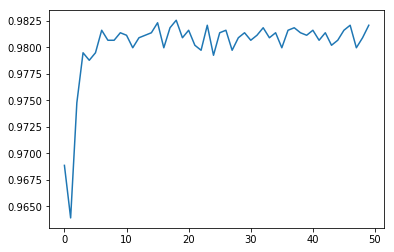

In [9]:
scores = []
for i in range(50):
    clf = RandomForestClassifier(n_estimators=i+1)
    s = cross_val_score(clf, X_train, Y_train, cv=5)
    scores.append(s.mean())
plt.plot(scores);
print("Best number of estimator : " + str(np.argmax(scores) + 1))

Best max depth : 19


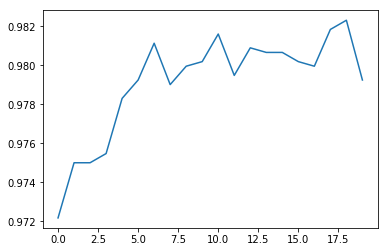

In [10]:
scores = []
for i in range(20):
    clf = RandomForestClassifier(n_estimators=17, max_depth=i+1)
    s = cross_val_score(clf, X_train, Y_train, cv=5)
    scores.append(s.mean())
plt.plot(scores);
print("Best max depth : " + str(np.argmax(scores) + 1))

In [11]:
clf = RandomForestClassifier(n_estimators=17, max_depth=8)
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.98303487276154566

In [12]:
for i,name in enumerate(featuresA):
    print("{} : {:.3}".format(name, clf.feature_importances_[i]))

has_name : 0.0
has_image : 0.00149
has_location : 0.00192
normal_name : 0.000573
favourites_count : 0.0445
has_biography : 0.00301
tweet_count : 0.108
followers_count : 0.054
friends_count : 0.017
ratio_followers_friends : 0.167
ratio_friends_followers : 0.159
ratio_followers_friends_pow : 0.247
ratio_friends_followers_pow : 0.172
has_url : 0.00124
bot_in_biography : 0.0
is_listed : 0.0216
listed_count : 0.00157


### Decision tree classifier

Best max depth : 39


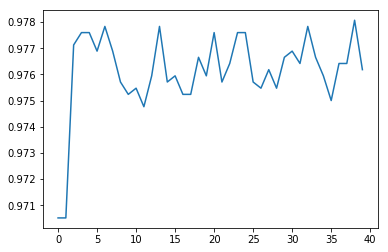

In [13]:
scores = []
for i in range(40):
    clf = DecisionTreeClassifier(max_depth=i+1)
    s = cross_val_score(clf, X_train, Y_train, cv=5)
    scores.append(s.mean())
plt.plot(scores);
print("Best max depth : " + str(np.argmax(scores) + 1))

In [14]:
clf = DecisionTreeClassifier(max_depth=7)
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.97832233741753061

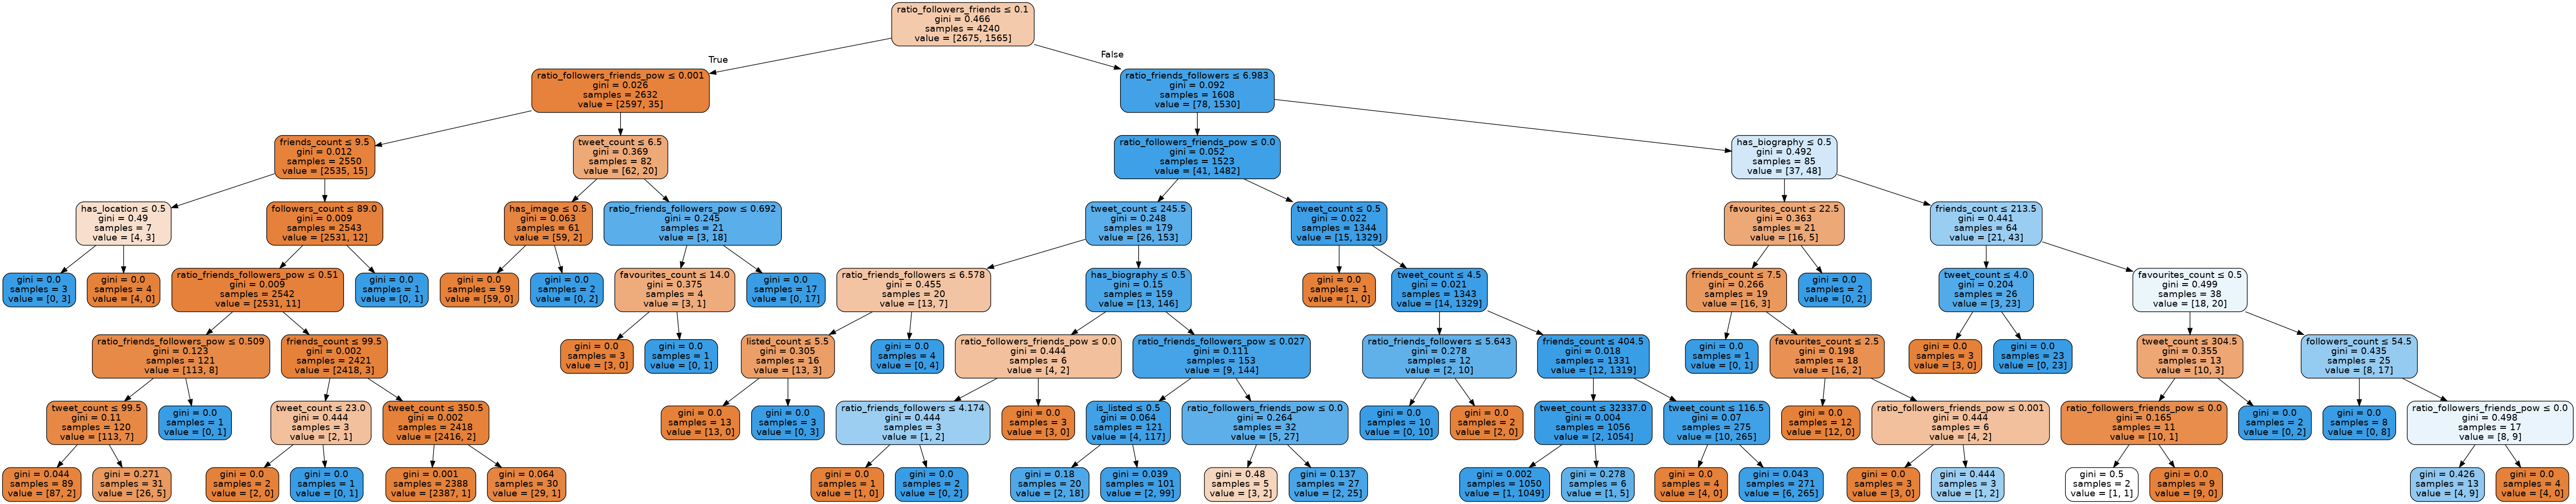

In [15]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=featuresA,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data)
Image(graph[0].create_png())

### Linear SVC

In [ ]:
clf = LinearSVC()
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.92459943449575877

### KNN

In [ ]:
scores = []
for i in range(20):
    clf = KNeighborsClassifier(n_neighbors=i+1)
    s = cross_val_score(clf, X_train, Y_train, cv=5)
    scores.append(s.mean())
scores = np.array(scores)
plt.plot(range(1, 21), scores);
print("Best number of neighbors : " + str(scores.argmax() + 1))

In [ ]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)